In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import cv2

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [4]:
path = r'C:\Users\rishi\Downloads\BrainT\brain_tumor_dataset'
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['no', 'yes']
253


In [5]:
for dir in os.listdir(path):
    no_images= len(os.listdir(os.path.join(path,dir)))
    print(no_images)

98
155


In [6]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\rishi\Downloads\BrainT\brain_tumor_dataset\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [7]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'C:\Users\rishi\Downloads\BrainT\brain_tumor_dataset\no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [9]:
result = np.array(result)
result = result.reshape(139,2)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, random_state=0,shuffle=True)

In [11]:
y_train.shape

(111, 2)

In [80]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [73]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [13]:
history = model.fit(x_train, y_train, epochs = 40, shuffle=True,batch_size = 32,verbose =1,validation_data = (x_test, y_test),callbacks=None)

Epoch 1/40
4/4 [==============================] - 10s 2s/step - loss: 10.3322 - accuracy: 0.6486 - val_loss: 18.7991 - val_accuracy: 0.6071
Epoch 2/40
4/4 [==============================] - 6s 1s/step - loss: 5.7150 - accuracy: 0.8288 - val_loss: 25.8937 - val_accuracy: 0.6429
Epoch 3/40
4/4 [==============================] - 6s 2s/step - loss: 2.5046 - accuracy: 0.8919 - val_loss: 27.0027 - val_accuracy: 0.6071
Epoch 4/40
4/4 [==============================] - 7s 2s/step - loss: 1.8624 - accuracy: 0.9369 - val_loss: 17.6569 - val_accuracy: 0.7143
Epoch 5/40
4/4 [==============================] - 7s 2s/step - loss: 2.4119 - accuracy: 0.9189 - val_loss: 9.6248 - val_accuracy: 0.7500
Epoch 6/40
4/4 [==============================] - 7s 2s/step - loss: 0.2442 - accuracy: 0.9640 - val_loss: 8.0422 - val_accuracy: 0.7500
Epoch 7/40
4/4 [==============================] - 7s 2s/step - loss: 1.2926 - accuracy: 0.9189 - val_loss: 8.1039 - val_accuracy: 0.8214
Epoch 8/40
4/4 [===================

In [116]:
history = model.fit(x_train, y_train, epochs = 20, shuffle=True,batch_size = 32,verbose =1,validation_data = (x_test, y_test),callbacks=None)

Epoch 1/20
4/4 [==============================] - 4s 1s/step - loss: 0.0187 - accuracy: 0.9910 - val_loss: 5.3876 - val_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 4s 960ms/step - loss: 2.2208e-05 - accuracy: 1.0000 - val_loss: 5.2808 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 4s 959ms/step - loss: 8.5849e-04 - accuracy: 1.0000 - val_loss: 5.2202 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 4s 964ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 5.1229 - val_accuracy: 0.7857
Epoch 5/20
4/4 [==============================] - 4s 940ms/step - loss: 2.7221e-06 - accuracy: 1.0000 - val_loss: 5.0693 - val_accuracy: 0.7857
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.1431 - accuracy: 0.9910 - val_loss: 4.9744 - val_accuracy: 0.7857
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 9.2860e-05 - accuracy: 1.0000 - val_loss: 4.9578 - val_accuracy: 0.7857
Epoch 8/20
4/

In [115]:
history = model.fit(x_train, y_train, epochs = 30, shuffle=True,batch_size = 32,verbose =1,validation_data = (x_test, y_test),callbacks=None)

Epoch 1/30
4/4 [==============================] - 5s 1s/step - loss: 10.4885 - accuracy: 0.6577 - val_loss: 106.9530 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 5s 1s/step - loss: 23.5689 - accuracy: 0.6937 - val_loss: 99.2895 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 4s 952ms/step - loss: 16.1908 - accuracy: 0.7117 - val_loss: 30.9325 - val_accuracy: 0.7143
Epoch 4/30
4/4 [==============================] - 5s 1s/step - loss: 4.6411 - accuracy: 0.8288 - val_loss: 13.5214 - val_accuracy: 0.6071
Epoch 5/30
4/4 [==============================] - 4s 946ms/step - loss: 5.4244 - accuracy: 0.8468 - val_loss: 10.9962 - val_accuracy: 0.6429
Epoch 6/30
4/4 [==============================] - 4s 930ms/step - loss: 2.1039 - accuracy: 0.9189 - val_loss: 12.2292 - val_accuracy: 0.7143
Epoch 7/30
4/4 [==============================] - 5s 1s/step - loss: 1.6543 - accuracy: 0.9550 - val_loss: 16.1585 - val_accuracy: 0.6429
Epoch 8/30
4/4 [=====

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  #1

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [13]:
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam",)
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import BinaryCrossentropy
optimizer = SGD(learning_rate=0.01)
loss_fn = BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [14]:
history = model.fit(x=x_train, y=y_train, epochs=14, batch_size=20)

Epoch 1/14


C:\Users\rishi\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 5s 708ms/step - loss: 4.6654 - accuracy: 0.6306
Epoch 2/14
6/6 [==============================] - 4s 724ms/step - loss: 0.8602 - accuracy: 0.7027
Epoch 3/14
6/6 [==============================] - 4s 719ms/step - loss: 0.3267 - accuracy: 0.9009
Epoch 4/14
6/6 [==============================] - 4s 713ms/step - loss: 0.3818 - accuracy: 0.8198
Epoch 5/14
6/6 [==============================] - 5s 857ms/step - loss: 0.1923 - accuracy: 0.9099
Epoch 6/14
6/6 [==============================] - 5s 889ms/step - loss: 0.1860 - accuracy: 0.9459
Epoch 7/14
6/6 [==============================] - 5s 809ms/step - loss: 0.0856 - accuracy: 0.9820
Epoch 8/14
6/6 [==============================] - 5s 925ms/step - loss: 0.1655 - accuracy: 0.9550
Epoch 9/14
6/6 [==============================] - 5s 864ms/step - loss: 0.1151 - accuracy: 0.9550
Epoch 10/14
6/6 [==============================] - 4s 699ms/step - loss: 0.0529 - accuracy: 0.9820
Epoch 11/14
6/6 [=============

# loss

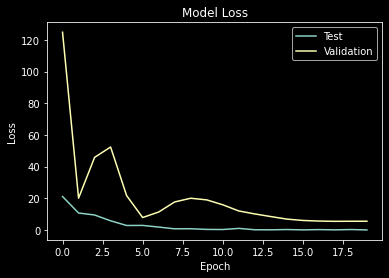

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   #85 %
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test','Validation'], loc='upper right')
plt.show()

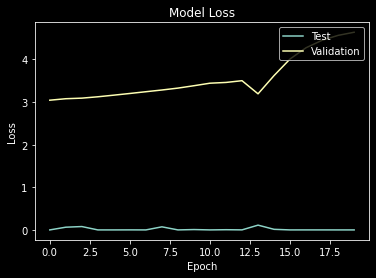

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  #89 %
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

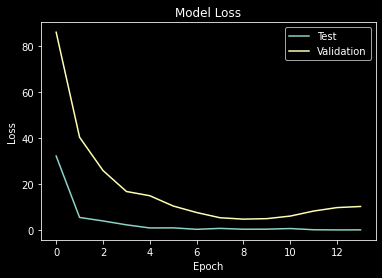

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

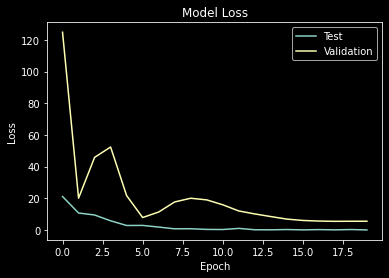

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])    #85 %
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

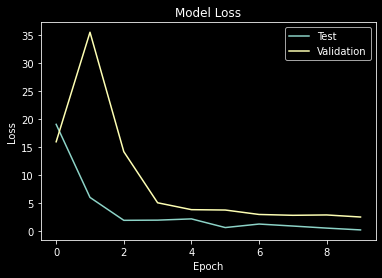

In [28]:
#summarize for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])       #82%
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Accuracy

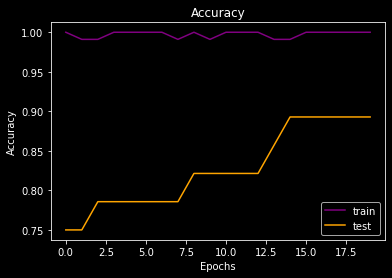

In [93]:
#new one
plt.plot(history.history["accuracy"],c="purple")   #89
plt.plot(history.history["val_accuracy"],c="orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","test"])
plt.show()

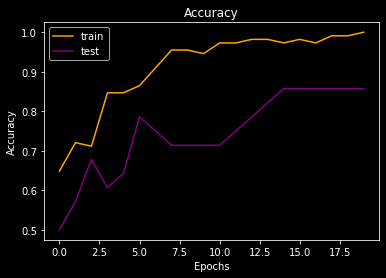

In [113]:
#new 
plt.plot(history.history["accuracy"],c="orange")
plt.plot(history.history["val_accuracy"],c="purple")   #85 %
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","test"])
plt.show()

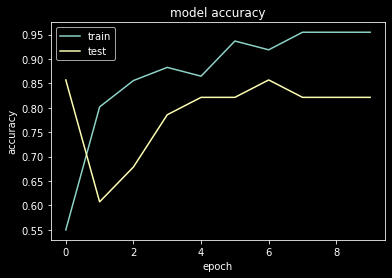

In [29]:
# summarize history for accuracy old
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')                     #82 %
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence That No, Its not a tumor


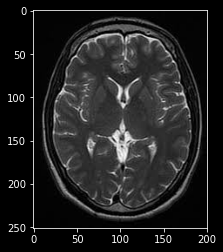

In [91]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rishi\Downloads\BrainT\brain_tumor_dataset\no\8 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)         # This method will show the image in any viewer images
print(str(res[0][classification]*100) + '% Confidence That ' + names(classification))

99.99618530273438% Confidence That Its a Tumor


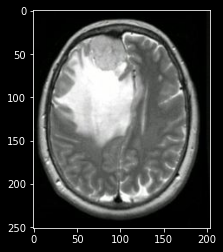

In [92]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rishi\Downloads\BrainT\brain_tumor_dataset\yes\Y36.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence That ' + names(classification))

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)


1/1 [==============================] - 0s 236ms/step


In [60]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.85      0.79      0.81        14

    accuracy                           0.82        28
   macro avg       0.82      0.82      0.82        28
weighted avg       0.82      0.82      0.82        28



In [61]:
cm = confusion_matrix(y_test_new, pred)
print(cm)

[[12  2]
 [ 3 11]]


In [87]:
#Final accuracy of the model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print('Accuracy: {:.4f}%'.format(accuracy))

Accuracy: 0.8214%


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)


1/1 [==============================] - 0s 402ms/step


In [41]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.79      0.85        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28



In [42]:
cm = confusion_matrix(y_test_new, pred)
print(cm)

[[13  1]
 [ 3 11]]


<AxesSubplot:>

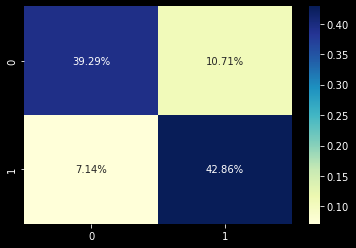

In [38]:
import seaborn 
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='YlGnBu')  #82%

<AxesSubplot:>

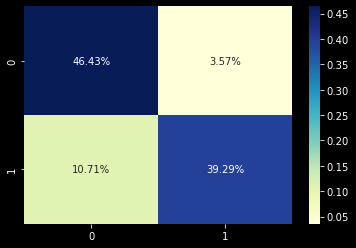

In [110]:
import seaborn 
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='YlGnBu')  #85%

<AxesSubplot:>

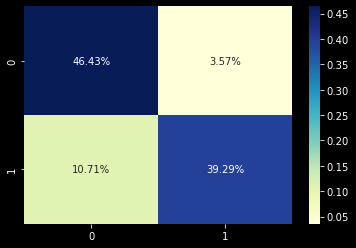

In [86]:
import seaborn 
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='YlGnBu')

In [37]:
#Final accuracy of the model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.8214


In [89]:
acc=model.evaluate(x_train,y_train)[1]
print('the accuracy of our model is',acc*100,'%')

4/4 [==============================] - 1s 319ms/step - loss: 0.0762 - accuracy: 0.9820
the accuracy of our model is 98.19819927215576 %


In [87]:
acc=model.evaluate(x_test,y_test)[1]
print('the accuracy of our model is',acc*100,'%')

1/1 [==============================] - 0s 339ms/step - loss: 4.6376 - accuracy: 0.8929
the accuracy of our model is 89.28571343421936 %


In [112]:
acc=model.evaluate(x_train,y_train)[1]
print('the accuracy of our model is',acc*100,'%')

4/4 [==============================] - 1s 297ms/step - loss: 0.2099 - accuracy: 0.9730
the accuracy of our model is 97.29729890823364 %


In [111]:
acc=model.evaluate(x_test,y_test)[1]
print('the accuracy of our model is',acc*100,'%')

1/1 [==============================] - 0s 386ms/step - loss: 5.4863 - accuracy: 0.8571
the accuracy of our model is 85.71428656578064 %


In [27]:
acc=model.evaluate(x_test,y_test)[1]
print('the accuracy of our model is',acc*100,'%')

1/1 [==============================] - 0s 208ms/step - loss: 2.5533 - accuracy: 0.8214
the accuracy of our model is 82.14285969734192 %
